In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.shape

(545, 13)

<Axes: xlabel='price', ylabel='area'>

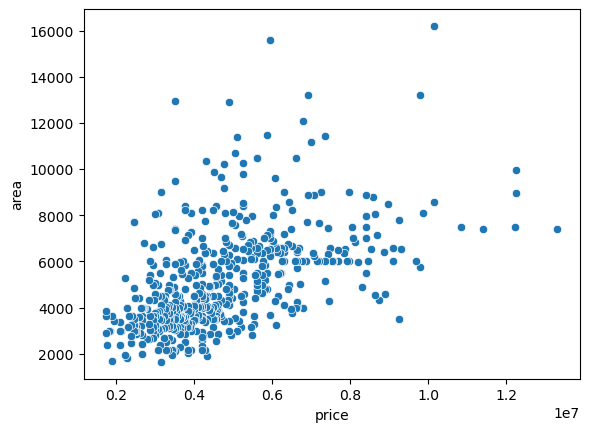

In [6]:
sns.scatterplot(data=df,x='price',y='area')

In [7]:
low_p,high_p=df['price'].quantile([0.05,0.95])
low_area,high_area=df['area'].quantile([0.05,0.95])
df_wo_outlier=df[df['price'].between(low_p,high_p)& df['area'].between(low_area,high_area)]

In [8]:
df_wo_outlier

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2450000,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
517,2450000,3000,2,1,1,yes,no,no,no,no,1,no,unfurnished
518,2450000,3500,2,1,1,yes,yes,no,no,no,0,no,unfurnished
519,2450000,4840,2,1,2,yes,no,no,no,no,0,no,unfurnished


<Axes: xlabel='price', ylabel='area'>

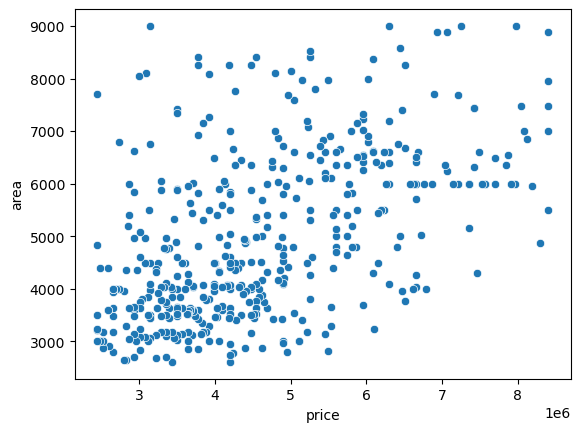

In [9]:
sns.scatterplot(data=df_wo_outlier,x='price',y='area')

In [10]:
df_wo_outlier.shape

(450, 13)

In [11]:
x=df_wo_outlier.drop('price',axis=1)
y=df_wo_outlier['price']

In [12]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
517,3000,2,1,1,yes,no,no,no,no,1,no,unfurnished
518,3500,2,1,1,yes,yes,no,no,no,0,no,unfurnished
519,4840,2,1,2,yes,no,no,no,no,0,no,unfurnished


In [13]:
y

27     8400000
28     8400000
29     8400000
30     8400000
31     8400000
        ...   
516    2450000
517    2450000
518    2450000
519    2450000
520    2450000
Name: price, Length: 450, dtype: int64

In [14]:
df_wo_outlier.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
def string(column):
    return any(isinstance(value,str) for value in column)


In [16]:
column_with_s=[column for column in x.columns if string(x[column]) ]
strings=[]
if string:
    for column in column_with_s:
        strings.append(column)


In [17]:
strings

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [18]:
strings.remove('furnishingstatus')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for col in strings:
    l=LabelEncoder()
    x[col]=l.fit_transform(x[col])
    

In [21]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished
28,7950,5,2,2,1,0,1,1,0,2,0,unfurnished
29,5500,4,2,2,1,0,1,0,1,1,1,semi-furnished
30,7475,3,2,4,1,0,0,0,1,2,0,unfurnished
31,7000,3,1,4,1,0,0,0,1,2,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,0,1,0,0,0,1,0,unfurnished
517,3000,2,1,1,1,0,0,0,0,1,0,unfurnished
518,3500,2,1,1,1,1,0,0,0,0,0,unfurnished
519,4840,2,1,2,1,0,0,0,0,0,0,unfurnished


In [22]:
arr=x['furnishingstatus']

In [23]:
dataset=pd.DataFrame(arr)
dataset

,furnishingstatus
27,semi-furnished
28,unfurnished
29,semi-furnished
30,unfurnished
31,semi-furnished
...,...
516,unfurnished
517,unfurnished
518,unfurnished
519,unfurnished


In [24]:
encoded_df=pd.get_dummies(dataset,columns=['furnishingstatus'],drop_first=True)
encoded_df

,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
27,True,False
28,False,True
29,True,False
30,False,True
31,True,False
...,...,...
516,False,True
517,False,True
518,False,True
519,False,True


In [25]:
x=x.drop('furnishingstatus',axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
27,8875,3,1,1,1,0,0,0,0,1,0
28,7950,5,2,2,1,0,1,1,0,2,0
29,5500,4,2,2,1,0,1,0,1,1,1
30,7475,3,2,4,1,0,0,0,1,2,0
31,7000,3,1,4,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,0,1,0,0,0,1,0
517,3000,2,1,1,1,0,0,0,0,1,0
518,3500,2,1,1,1,1,0,0,0,0,0
519,4840,2,1,2,1,0,0,0,0,0,0


In [26]:
x=pd.concat([x,encoded_df],axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
27,8875,3,1,1,1,0,0,0,0,1,0,True,False
28,7950,5,2,2,1,0,1,1,0,2,0,False,True
29,5500,4,2,2,1,0,1,0,1,1,1,True,False
30,7475,3,2,4,1,0,0,0,1,2,0,False,True
31,7000,3,1,4,1,0,0,0,1,2,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,3240,2,1,1,0,1,0,0,0,1,0,False,True
517,3000,2,1,1,1,0,0,0,0,1,0,False,True
518,3500,2,1,1,1,1,0,0,0,0,0,False,True
519,4840,2,1,2,1,0,0,0,0,0,0,False,True


In [27]:
y

27     8400000
28     8400000
29     8400000
30     8400000
31     8400000
        ...   
516    2450000
517    2450000
518    2450000
519    2450000
520    2450000
Name: price, Length: 450, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler  

st = StandardScaler()  
X_train = st.fit_transform(X_train)  
X_test= st.transform(X_test)  

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
mean_absolute_error(y_test,y_pred)

625245.6144386646

In [37]:
 mean_squared_error(y_test,y_pred)

719315949051.5527

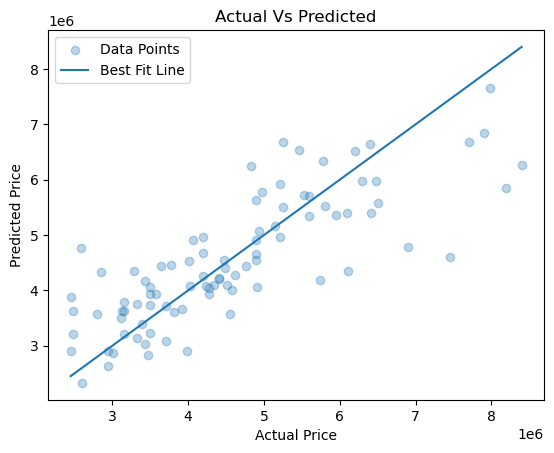

In [42]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(),y.max()],[y.min(),y.max()])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Vs Predicted")
plt.legend(['Data Points', 'Best Fit Line'], loc='upper left')